# Improving paddy productivity

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the paddy yield performance (test scores) is affected by other variables.


### 2) Data Collection
- Dataset Source - https://archive.ics.uci.edu/dataset/1186/paddy+dataset
- The data consists of 45 column and 2790 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

#### Import the CSV Data as Pandas DataFrame

In [2]:
# Charger les données
df = pd.read_csv("D:/End_To_End_Data_Science_Project/ML_Project_Regression/notebook/paddydataset.csv")

### Dataset information

- Hectares : Surface cultivée.
- Variety : Variété de riz (ex: CO_43, ponmani, delux ponni).
- Soil Types : Type de sol (ex: alluvial, clay).
- Seedrate (in Kg) : Quantité de semences utilisées.
- Intrants chimiques : Colonnes comme DAP_20days, Urea_40Days, Potassh_50Days (engrais).
- Données météorologiques : Températures (Min/Max), Précipitations (Rain), Humidité (Relative Humidity) et Vitesse du vent par intervalles de jours.
- Paddy yield (in Kg) : Variable cible représentant le rendement total.

### Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

# 1. INITIAL CHECKS

In [3]:
print("=" * 60)
print("DATA OVERVIEW")
print("=" * 60)
df.head()

DATA OVERVIEW


Hectares      Agriblock      Variety Soil Types  Seedrate(in Kg)  \
0          6     Cuddalore        CO_43   alluvial              150   
1          6   Kurinjipadi      ponmani       clay              150   
2          6       Panruti  delux ponni   alluvial              150   
3          6  Kallakurichi        CO_43       clay              150   
4          6  Sankarapuram      ponmani   alluvial              150   

   LP_Mainfield(in Tonnes) Nursery  Nursery area (Cents)  \
0                     75.0     dry                   120   
1                     75.0     wet                   120   
2                     75.0     dry                   120   
3                     75.0     wet                   120   
4                     75.0     dry                   120   

   LP_nurseryarea(in Tonnes)  DAP_20days  Weed28D_thiobencarb  Urea_40Days  \
0                          6         240                   12       162.78   
1                          6         240                   12       162.78   
2                          6         240                   12       162.78   
3                          6         240                   12       162.78   
4                          6         240                   12       162.78   

   Potassh_50Days  Micronutrients_70Days  Pest_60Day(in ml)  30DRain( in mm)  \
0           62.28                     90               3600             19.6   
1           62.28                     90               3600             19.6   
2           62.28                     90               3600             18.5   
3           62.28                     90               3600             18.5   
4           62.28                     90               3600             18.1   

   30DAI(in mm)  30_50DRain( in mm)  30_50DAI(in mm)  51_70DRain(in mm)  \
0          20.4               187.2            270.8              167.0   
1          20.4               187.2            270.8              167.0   
2          21.5               185.2            272.8              165.3   
3          21.5               185.2            272.8              165.3   
4          21.9               185.6            272.4              166.1   

   51_70AI(in mm)  71_105DRain(in mm)  71_105DAI(in mm)  Min temp_D1_D30  \
0           250.0                61.0              64.0             18.5   
1           250.0                61.0              64.0             19.5   
2           251.7                60.0              65.0             20.0   
3           251.7                60.0              65.0             19.0   
4           250.9                60.2              64.8             20.5   

   Max temp_D1_D30  Min temp_D31_D60  Max temp_D31_D60  Min temp_D61_D90  \
0               34              16.0                30              15.5   
1               34              18.5                35              17.0   
2               35              18.0                30              17.5   
3               33              17.0                32              16.5   
4               32              17.5                28              18.0   

   Max temp_D61_D90  Min temp_D91_D120  Max temp_D91_D120  \
0              31.0               16.0               33.0   
1              32.5               16.0               30.5   
2              33.5               18.0               33.0   
3              31.5               15.5               32.5   
4              34.0               16.5               35.0   

   Inst Wind Speed_D1_D30(in Knots)  Inst Wind Speed_D31_D60(in Knots)  \
0                                 4                                 10   
1                                10                                  4   
2                                 4                                 12   
3                                 8                                  6   
4                                10                                 12   

   Inst Wind Speed_D61_D90(in Knots)  Inst Wind Speed_D91_D120(in Knots)  \
0           

In [4]:
print("\n" + "=" * 60)
print("Check Missing values")
print("=" * 60)
print(df.isna().sum())



Check Missing values
Hectares                              0
Agriblock                             0
Variety                               0
Soil Types                            0
Seedrate(in Kg)                       0
LP_Mainfield(in Tonnes)               0
Nursery                               0
Nursery area (Cents)                  0
LP_nurseryarea(in Tonnes)             0
DAP_20days                            0
Weed28D_thiobencarb                   0
Urea_40Days                           0
Potassh_50Days                        0
Micronutrients_70Days                 0
Pest_60Day(in ml)                     0
30DRain( in mm)                       0
30DAI(in mm)                          0
30_50DRain( in mm)                    0
30_50DAI(in mm)                       0
51_70DRain(in mm)                     0
51_70AI(in mm)                        0
71_105DRain(in mm)                    0
71_105DAI(in mm)                      0
Min temp_D1_D30                       0
Max temp_D1_D30   

#### There are no missing values in the data set

In [5]:
print("\n" + "=" * 60)
print("Check Duplicates")
print("=" * 60)
print(f"Number of duplicates: {df.duplicated().sum()}")


Check Duplicates
Number of duplicates: 451


In [6]:
# Suppression des doublons
df = df.drop_duplicates()

# Réinitialisation de l'index
# 'drop=True' évite que l'ancien index ne soit ajouté comme une nouvelle colonne
df = df.reset_index(drop=True)

# Vérification finale de la forme (shape) du dataset
print(f"Après suppression des doublons, la forme du dataset est : {df.shape}")

Après suppression des doublons, la forme du dataset est : (2338, 45)


In [7]:
print("\n" + "=" * 60)
print("Check data types")
print("=" * 60)
df.info()



Check data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 45 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hectares                            2338 non-null   int64  
 1   Agriblock                           2338 non-null   object 
 2   Variety                             2338 non-null   object 
 3   Soil Types                          2338 non-null   object 
 4   Seedrate(in Kg)                     2338 non-null   int64  
 5   LP_Mainfield(in Tonnes)             2338 non-null   float64
 6   Nursery                             2338 non-null   object 
 7   Nursery area (Cents)                2338 non-null   int64  
 8   LP_nurseryarea(in Tonnes)           2338 non-null   int64  
 9   DAP_20days                          2338 non-null   int64  
 10  Weed28D_thiobencarb                 2338 non-null   int64  
 11  Urea_40Days              

In [8]:
print("\n" + "=" * 60)
print("Checking the number of unique values of each column")
print("=" * 60)
print(df.nunique())


Checking the number of unique values of each column
Hectares                                6
Agriblock                               6
Variety                                 3
Soil Types                              2
Seedrate(in Kg)                         6
LP_Mainfield(in Tonnes)                 6
Nursery                                 2
Nursery area (Cents)                    6
LP_nurseryarea(in Tonnes)               6
DAP_20days                              6
Weed28D_thiobencarb                     6
Urea_40Days                             6
Potassh_50Days                          6
Micronutrients_70Days                   6
Pest_60Day(in ml)                       6
30DRain( in mm)                         3
30DAI(in mm)                            3
30_50DRain( in mm)                      3
30_50DAI(in mm)                         3
51_70DRain(in mm)                       3
51_70AI(in mm)                          3
71_105DRain(in mm)                      3
71_105DAI(in mm)       

In [9]:
print("\n" + "=" * 60)
print("Check statistics of data set")
print("=" * 60)
df.describe()


Check statistics of data set


Hectares   Seedrate(in Kg)  LP_Mainfield(in Tonnes)  \
count  2338.000000      2338.000000              2338.000000   
mean      3.736099        93.402481                46.701240   
std       1.450388        36.259703                18.129851   
min       1.000000        25.000000                12.500000   
25%       3.000000        75.000000                37.500000   
50%       4.000000       100.000000                50.000000   
75%       5.000000       125.000000                62.500000   
max       6.000000       150.000000                75.000000   

       Nursery area (Cents)  LP_nurseryarea(in Tonnes)   DAP_20days  \
count           2338.000000                2338.000000  2338.000000   
mean              74.721985                   3.736099   149.443969   
std               29.007762                   1.450388    58.015525   
min               20.000000                   1.000000    40.000000   
25%               60.000000                   3.000000   120.000000   
50%               80.000000                   4.000000   160.000000   
75%              100.000000                   5.000000   200.000000   
max              120.000000                   6.000000   240.000000   

       Weed28D_thiobencarb  Urea_40Days  Potassh_50Days  \
count          2338.000000  2338.000000     2338.000000   
mean              7.472198   101.360372       38.780710   
std               2.900776    39.349030       15.055029   
min               2.000000    27.130000       10.380000   
25%               6.000000    81.390000       31.140000   
50%               8.000000   108.520000       41.520000   
75%              10.000000   135.650000       51.900000   
max              12.000000   162.780000       62.280000   

       Micronutrients_70Days  Pest_60Day(in ml)  30DRain( in mm)  \
count            2338.000000        2338.000000      2338.000000   
mean               56.041488        2241.659538        18.712789   
std                21.755822         870.232869         0.640051   
min                15.000000         600.000000        18.100000   
25%                45.000000        1800.000000        18.100000   
50%                60.000000        2400.000000        18.500000   
75%                75.000000        3000.000000        19.600000   
max                90.000000        3600.000000        19.600000   

       30DAI(in mm)  30_50DRain( in mm)  30_50DAI(in mm)  51_70DRain(in mm)  \
count   2338.000000         2338.000000      2338.000000        2338.000000   
mean      21.287211          186.001540       271.998460         166.150513   
std        0.640051            0.851768         0.851768           0.676649   
min       20.400000          185.200000       270.800000         165.300000   
25%       20.400000          185.200000       270.800000         165.300000   
50%       21.500000          185.600000       272.400000         166.100000   
75%       21.900000          187.200000       272.800000         167.000000   
max       21.900000          187.200000       272.800000         167.000000   

       51_70AI(in mm)  71_105DRain(in mm)  71_105DAI(in mm)  Min temp_D1_D30  \
count     2338.000000         2338.000000       2338.000000      2338.000000   
mean       250.849487           60.400770         64.599230        19.330838   
std          0.676649            0.425884          0.425884         0.873429   
min        250.000000           60.000000         64.000000        18.000000   
25%        250.000000           60.000000         64.000000        18.500000   
50%        250.900000           60.200000         64.800000        19.500000   
75%        251.700000           61.000000         65.000000        20.000000   
max        251.700000           61.000000         65.000000        20.500000   

       Max temp_D1_D30  Min temp_D31_D60  Max temp_D31_D60  Min temp_D61_D90  \
count      2338.000000       2338.000000       2338.000000       2338.000000   
mean         33.114200         17.133234         31.34

#### Insight
- According to the description of the numerical data above, environmental factors such as relative humidity show very high and constant averages, ranging from 76.38% to 87.63%.

- Temperature variables (Min/Max) show very low standard deviations (between 0.42 and 2.5), indicating relatively stable climatic conditions across all samples.

- While the minimum paddy yield recorded is 5,410 kg, the maximum yield reaches 38,814 kg, with an overall average of 22,610 kg.

- There is considerable variability in the use of inputs, particularly for urea (Urea_40Days) with a standard deviation of 39.34, suggesting highly diverse fertilisation practices depending on the plot.

# 2. IDENTIFICATION OF VARIABLES

In [10]:
# Define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("\n" + "=" * 60)
print("TYPES OF VARIABLES")
print("=" * 60)
print(f'We have {len(numeric_features)} numerical variables : {numeric_features}')
print(f'\nWe have {len(categorical_features)} categorical variables : {categorical_features}')


TYPES OF VARIABLES
We have 37 numerical variables : ['Hectares ', 'Seedrate(in Kg)', 'LP_Mainfield(in Tonnes)', 'Nursery area (Cents)', 'LP_nurseryarea(in Tonnes)', 'DAP_20days', 'Weed28D_thiobencarb', 'Urea_40Days', 'Potassh_50Days', 'Micronutrients_70Days', 'Pest_60Day(in ml)', '30DRain( in mm)', '30DAI(in mm)', '30_50DRain( in mm)', '30_50DAI(in mm)', '51_70DRain(in mm)', '51_70AI(in mm)', '71_105DRain(in mm)', '71_105DAI(in mm)', 'Min temp_D1_D30', 'Max temp_D1_D30', 'Min temp_D31_D60', 'Max temp_D31_D60', 'Min temp_D61_D90', 'Max temp_D61_D90', 'Min temp_D91_D120', 'Max temp_D91_D120', 'Inst Wind Speed_D1_D30(in Knots)', 'Inst Wind Speed_D31_D60(in Knots)', 'Inst Wind Speed_D61_D90(in Knots)', 'Inst Wind Speed_D91_D120(in Knots)', 'Relative Humidity_D1_D30', 'Relative Humidity_D31_D60', 'Relative Humidity_D61_D90', 'Relative Humidity_D91_D120', 'Trash(in bundles)', 'Paddy yield(in Kg)']

We have 8 categorical variables : ['Agriblock', 'Variety', 'Soil Types', 'Nursery', 'Wind Dir

# 3. DISPLAYING CATEGORIES

In [11]:
print("\n" + "=" * 60)
print("CATEGORIES OF VARIABLES")
print("=" * 60)

for col in categorical_features:
    print(f"\nCategories in '{col}':")
    print(df[col].unique())


CATEGORIES OF VARIABLES

Categories in 'Agriblock':
['Cuddalore' 'Kurinjipadi' 'Panruti' 'Kallakurichi' 'Sankarapuram'
 'Chinnasalem']

Categories in 'Variety':
['CO_43' 'ponmani' 'delux ponni']

Categories in 'Soil Types':
['alluvial' 'clay']

Categories in 'Nursery':
['dry' 'wet']

Categories in 'Wind Direction_D1_D30':
['SW' 'NW' 'ENE' 'W' 'SSE' 'E']

Categories in 'Wind Direction_D31_D60':
['W' 'S' 'NE' 'WNW' 'ENE']

Categories in 'Wind Direction_D61_D90':
['NNW' 'SE' 'NNE' 'SW' 'NE']

Categories in 'Wind Direction_D91_D120':
['WSW' 'SSE' 'W' 'S' 'NW' 'NNW']


# 4. VISUALISATIONS - DISTRIBUTIONS

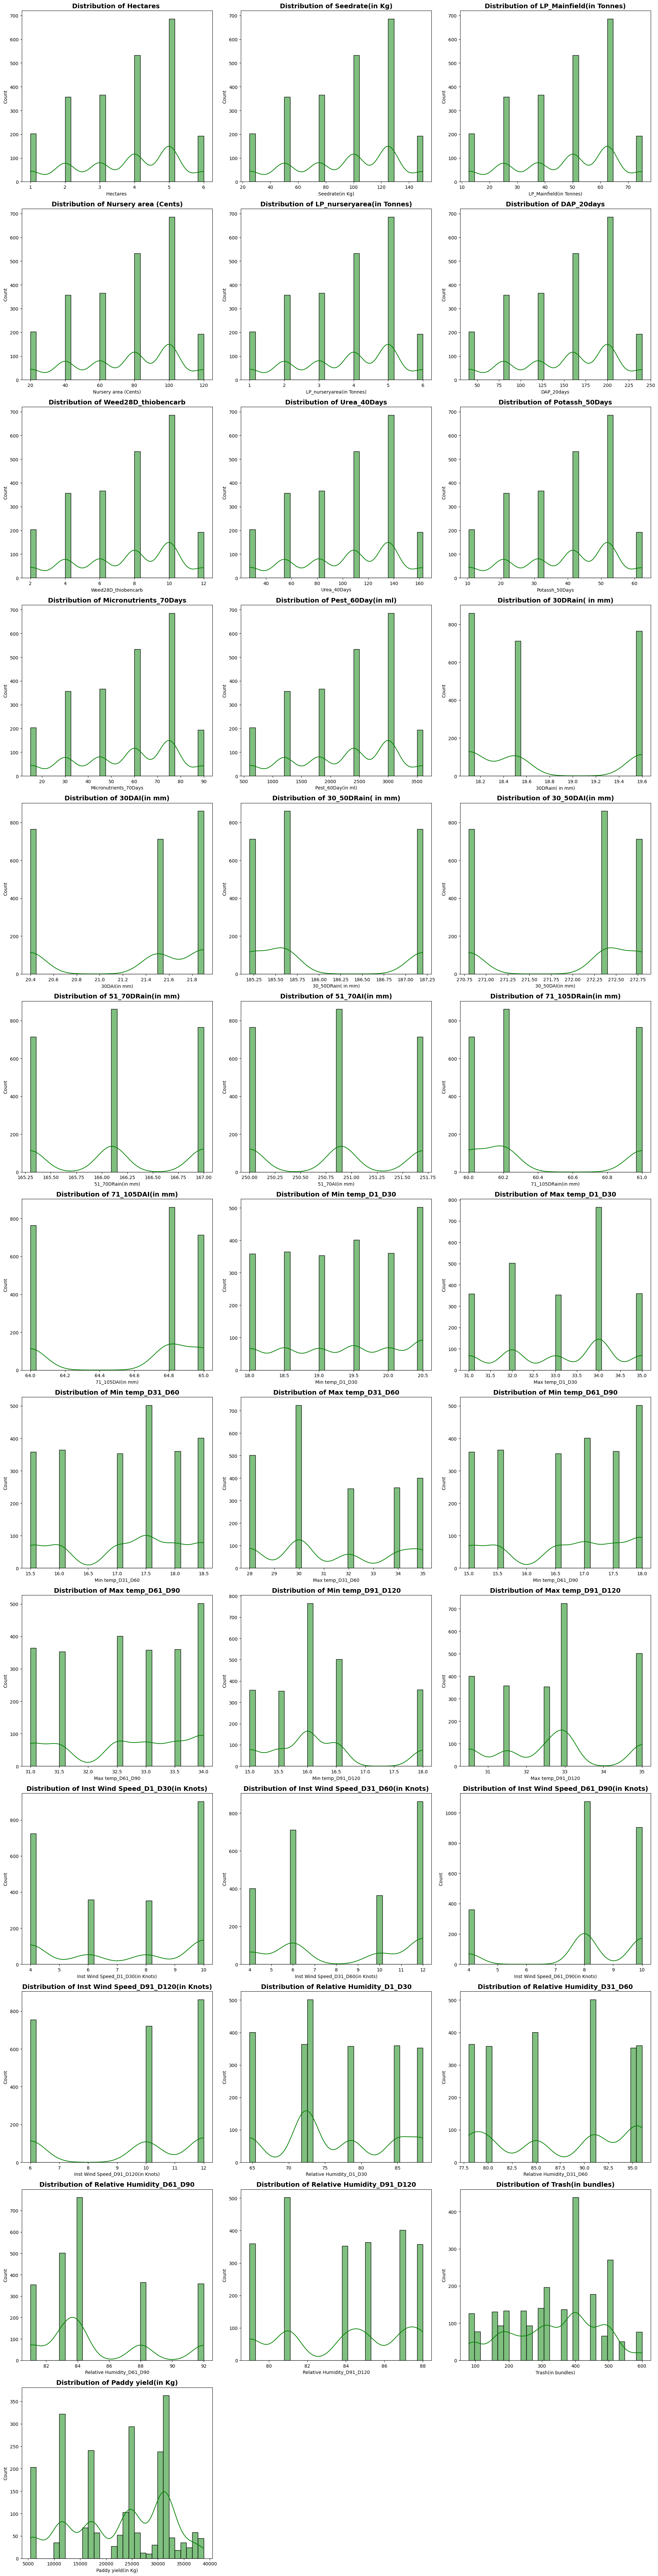

In [12]:
# Distribution of numerical variables
if len(numeric_features) > 0:
    n_cols = min(3, len(numeric_features))
    n_rows = (len(numeric_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
    axes = axes.flatten() if len(numeric_features) > 1 else [axes]
    
    for idx, feature in enumerate(numeric_features):
        sns.histplot(data=df, x=feature, bins=30, kde=True, color='green', ax=axes[idx])
        axes[idx].set_title(f'Distribution of {feature}', fontsize=14, fontweight='bold')
    
    # Hide empty axes
    for idx in range(len(numeric_features), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

#### Insights
- Numerical variables do not follow a normal distribution. 

# 5. BOXPLOTS FOR DETECTING OUTLIERS

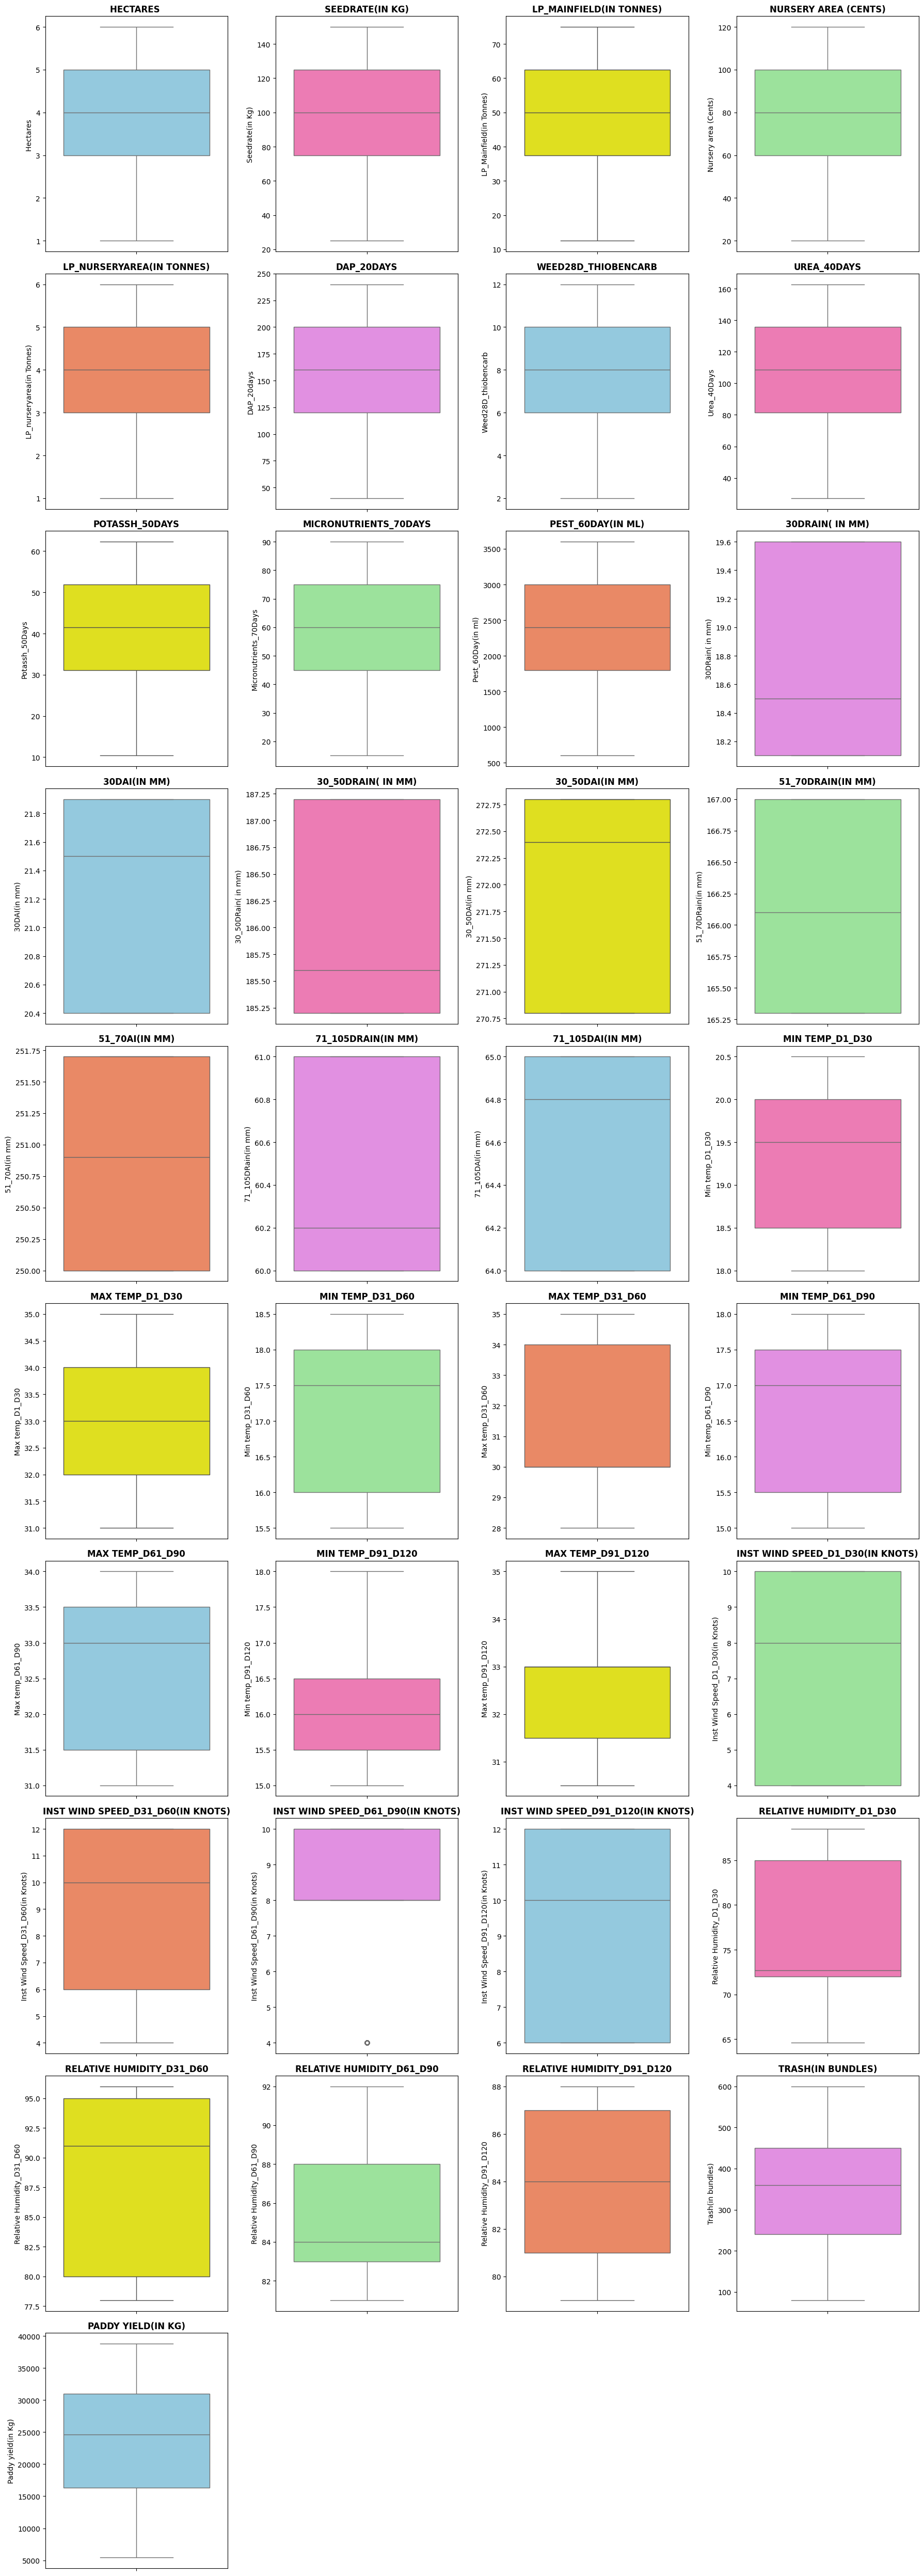

In [13]:
if len(numeric_features) > 0:
    n_features = min(37, len(numeric_features))  # Limiter à 6 features max
    n_cols = min(4, n_features)  # Maximum 4 colonnes par ligne
    n_rows = (n_features + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires
    
    plt.figure(figsize=(18, 5 * n_rows))
    colors = ['skyblue', 'hotpink', 'yellow', 'lightgreen', 'coral', 'violet']
    
    for idx, feature in enumerate(numeric_features[:n_features]):
        plt.subplot(n_rows, n_cols, idx + 1)
        sns.boxplot(y=df[feature], color=colors[idx % len(colors)])
        plt.title(feature.upper(), fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

#### Insights
1. Variables with Significant Outliers
- PEST_AGUSIVIT_ML: Presence of significant upper outliers
- 3NDRANIN_MM: Visible upper outliers
- Several temperature variables (MAX_TEMP, MIN_TEMP): A few extreme values

2. Variables with Narrow Distributions (Low Variability)
- HECTARES: Highly concentrated distribution, little variation
- LP_MANIFFIELDER_TONNES1: Low dispersion
- NURSERY_AREA_CENTS: Narrow distribution

3. Variables with High Variability
- PADDY_YIELD_KG: Wide range of values (approximately 10,000 to 40,000 kg)
- LP_WEEDSRANGAN_TONNES1: High dispersion
- DAP_30GR5: Significant variability

4. Distributions by Scale
Small values (< 100):
- HECTARES, NURSERY_AREA, SEGREGATIN_KG
Generally symmetrical distribution

- Average values (100-500):
Temperature variables (MIN/MAX TEMP)
Relative humidity
Wind speed

- Large values (> 1,000):
PADDY_YIELD_KG (likely target variable)
Several nutrient variables (3NDRANIN_MM, etc.)

5. Distribution symmetry
- Symmetrical distributions: Most temperature and humidity variables
- Skewed distributions: PADDY_YIELD_KG, PEST_AGUSIVIT_ML

6. Median vs. Mean
For several variables, the median line (orange) is:
- Centred: Symmetrical distribution (e.g. temperatures)
- Shifted downwards: Right-skewed distribution (e.g. PADDY_YIELD_KG)

# 6. ANALYSIS OF CATEGORICAL VARIABLES

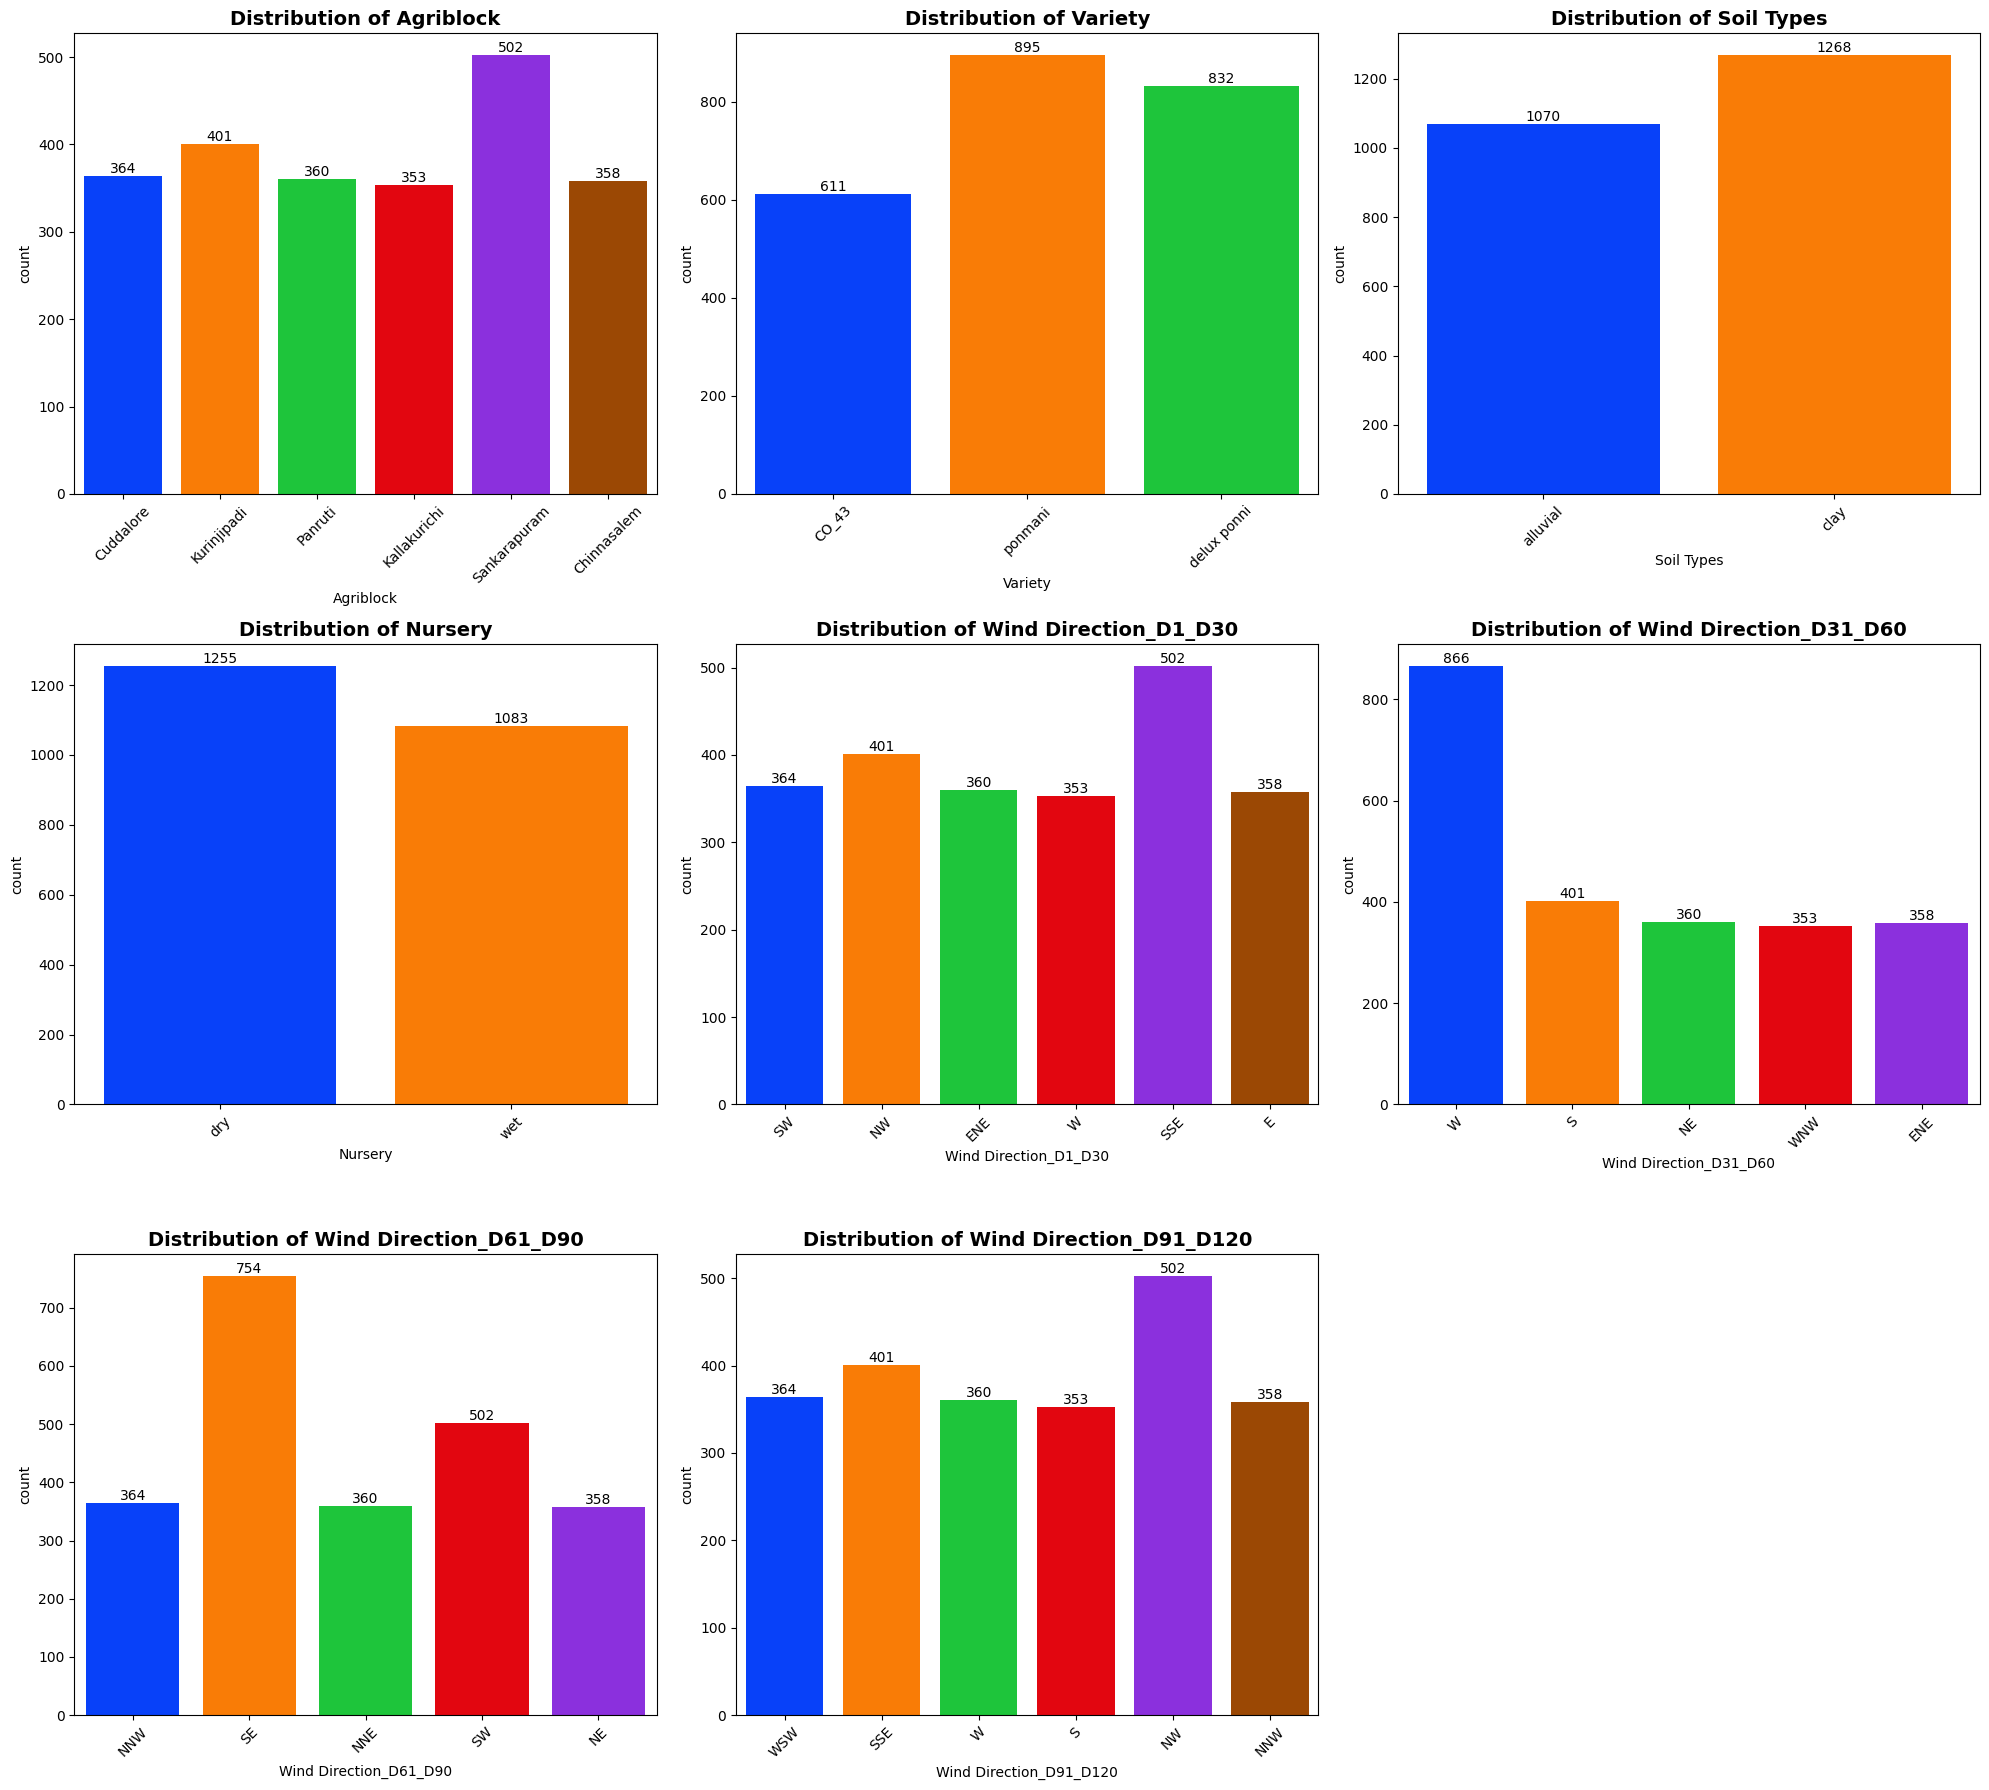

In [14]:
if len(categorical_features) > 0:
    # Countplots
    n_cols = min(3, len(categorical_features))
    n_rows = (len(categorical_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6*n_rows))
    axes = axes.flatten() if len(categorical_features) > 1 else [axes]
    
    for idx, feature in enumerate(categorical_features):
        sns.countplot(data=df, x=feature, palette='bright', ax=axes[idx], saturation=0.95)
        axes[idx].set_title(f'Distribution of {feature}', fontsize=14, fontweight='bold')
        axes[idx].tick_params(axis='x', rotation=45)
        
        # Add values to the bars
        for container in axes[idx].containers:
            axes[idx].bar_label(container, color='black', size=10)
    
    # Hide empty axes
    for idx in range(len(categorical_features), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# 7. PIE CHARTS

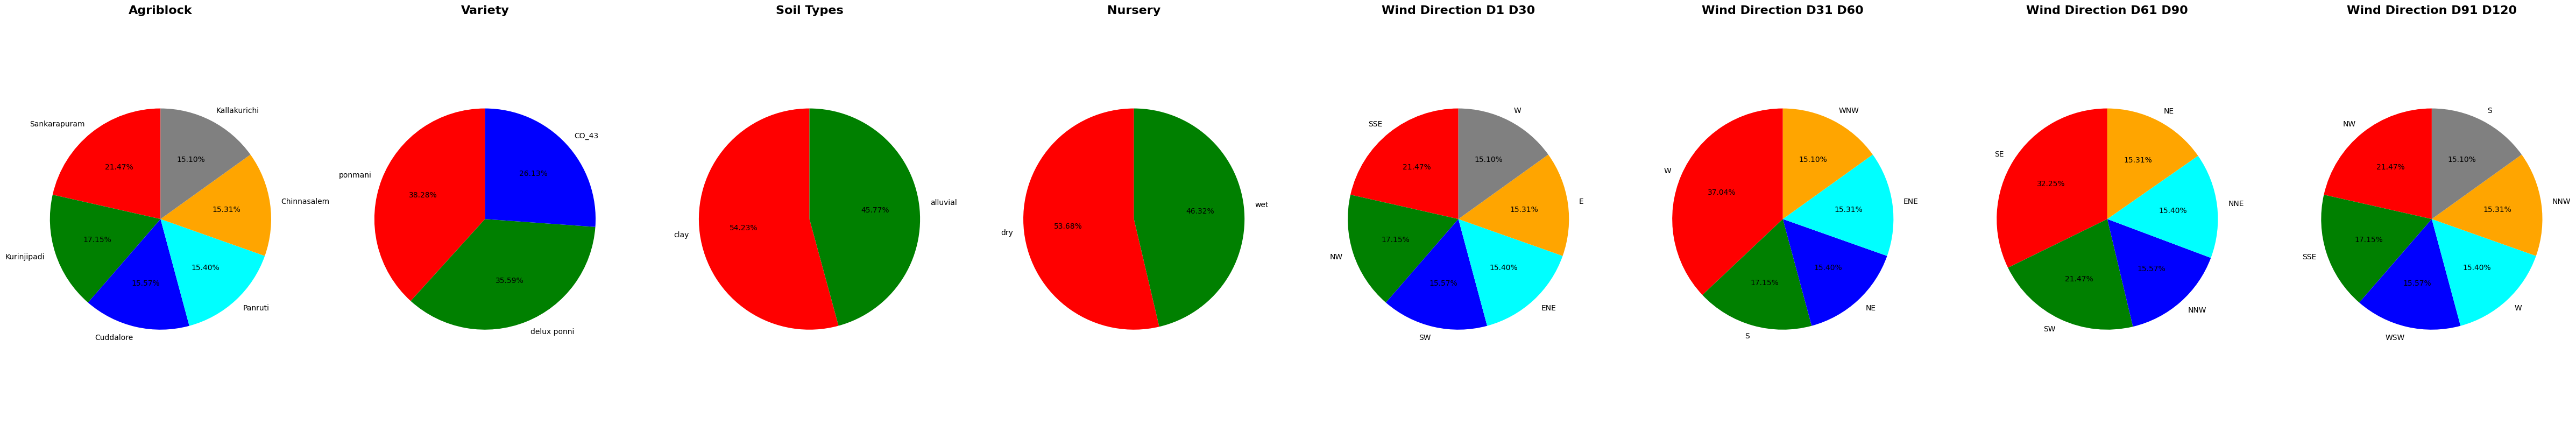

In [15]:
if len(categorical_features) > 0:
    n_plots = len(categorical_features)
    plt.rcParams['figure.figsize'] = (6*n_plots, 8)
    
    for idx, feature in enumerate(categorical_features, 1):
        plt.subplot(1, n_plots, idx)
        size = df[feature].value_counts()
        colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey', 'purple', 'pink']
        
        plt.pie(size, labels=size.index, colors=colors[:len(size)], 
                autopct='%.2f%%', startangle=90)
        plt.title(feature.replace('_', ' ').title(), fontsize=16, fontweight='bold')
        plt.axis('equal')
    
    plt.tight_layout()
    plt.show()

# 8. MATRICE DE CORRÉLATION

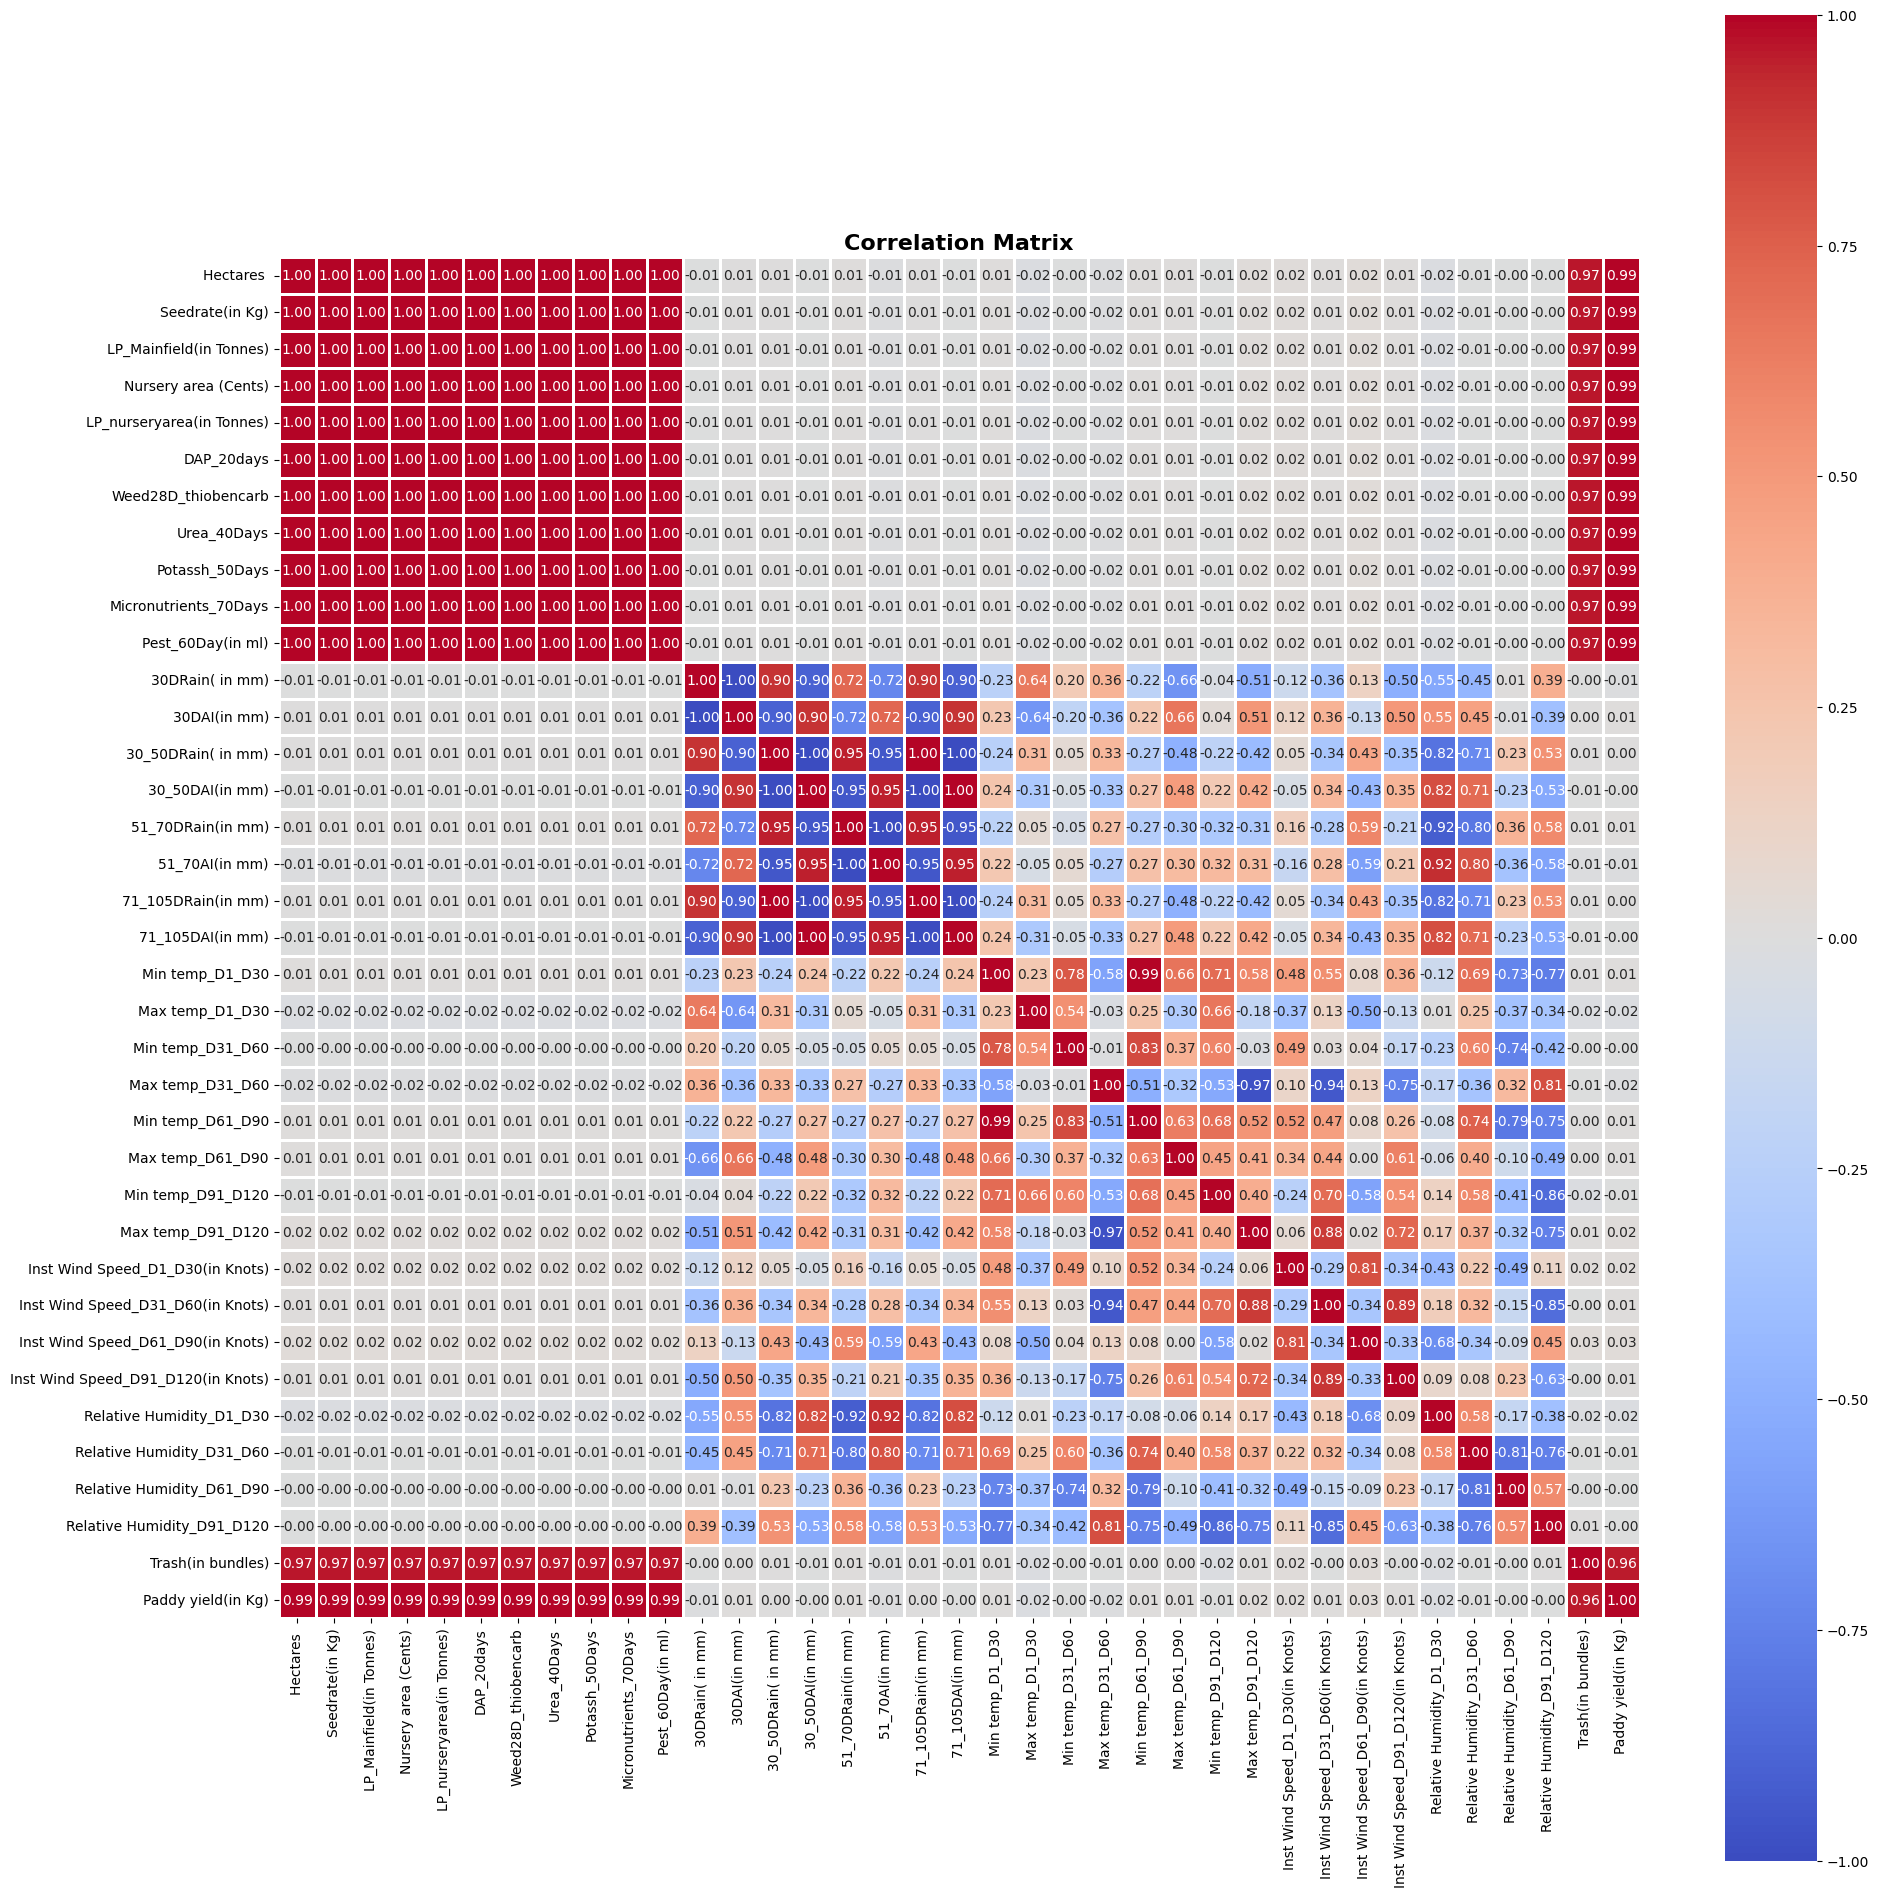

In [16]:
if len(numeric_features) > 1:
    plt.figure(figsize=(20, 20))
    correlation_matrix = df[numeric_features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=1, fmt='.2f')
    plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# 9. PAIRPLOT

In [17]:
if len(numeric_features) > 1 and len(categorical_features) > 0:
    # Use the first categorical variable for colouring
    hue_var = categorical_features[0] if categorical_features else None
    
    if df[hue_var].nunique() <= 10:  # Limit to a maximum of 10 categories
        sns.pairplot(df, hue=hue_var, diag_kind='kde', palette='husl')
        plt.suptitle('Pairplot of Numerical Variables', y=1.02, fontsize=16, fontweight='bold')
        plt.show()

# 10. CROSS-ANALYSIS

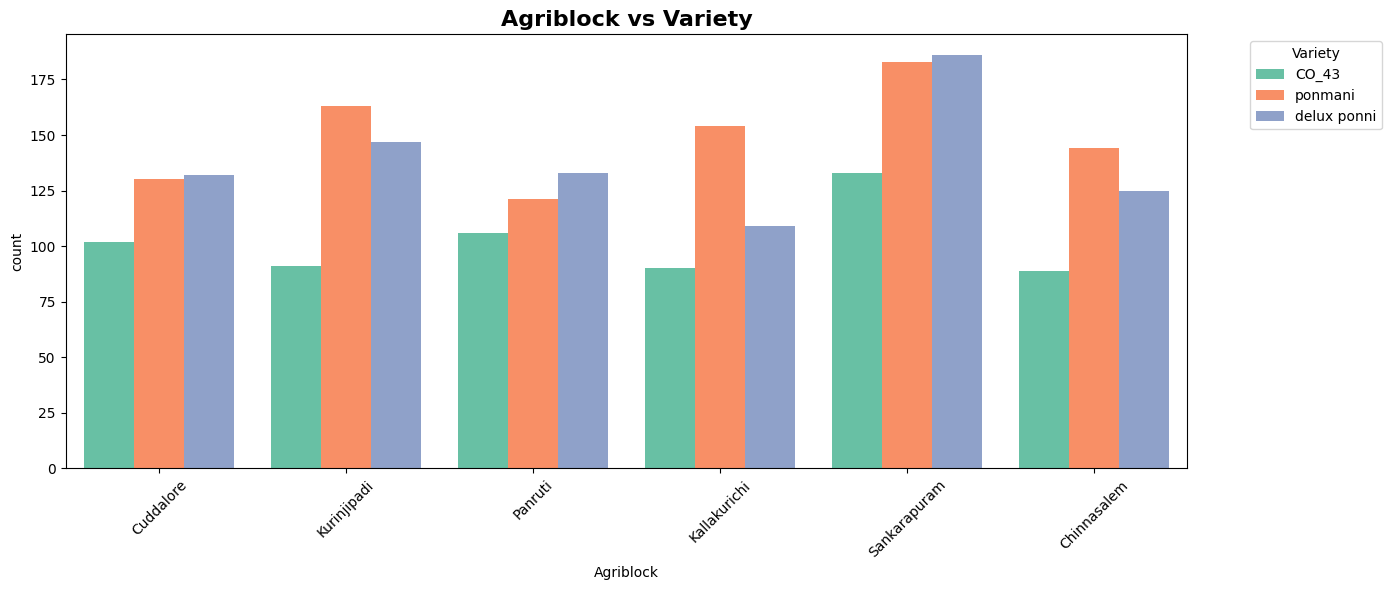

In [18]:
if len(categorical_features) >= 2 and len(numeric_features) > 0:
    # Cross-tabulation between two categorical variables
    cat1, cat2 = categorical_features[0], categorical_features[1]
    
    plt.figure(figsize=(14, 6))
    sns.countplot(data=df, x=cat1, hue=cat2, palette='Set2', saturation=0.95)
    plt.title(f'{cat1} vs {cat2}', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45)
    plt.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 11. VIOLINPLOTS

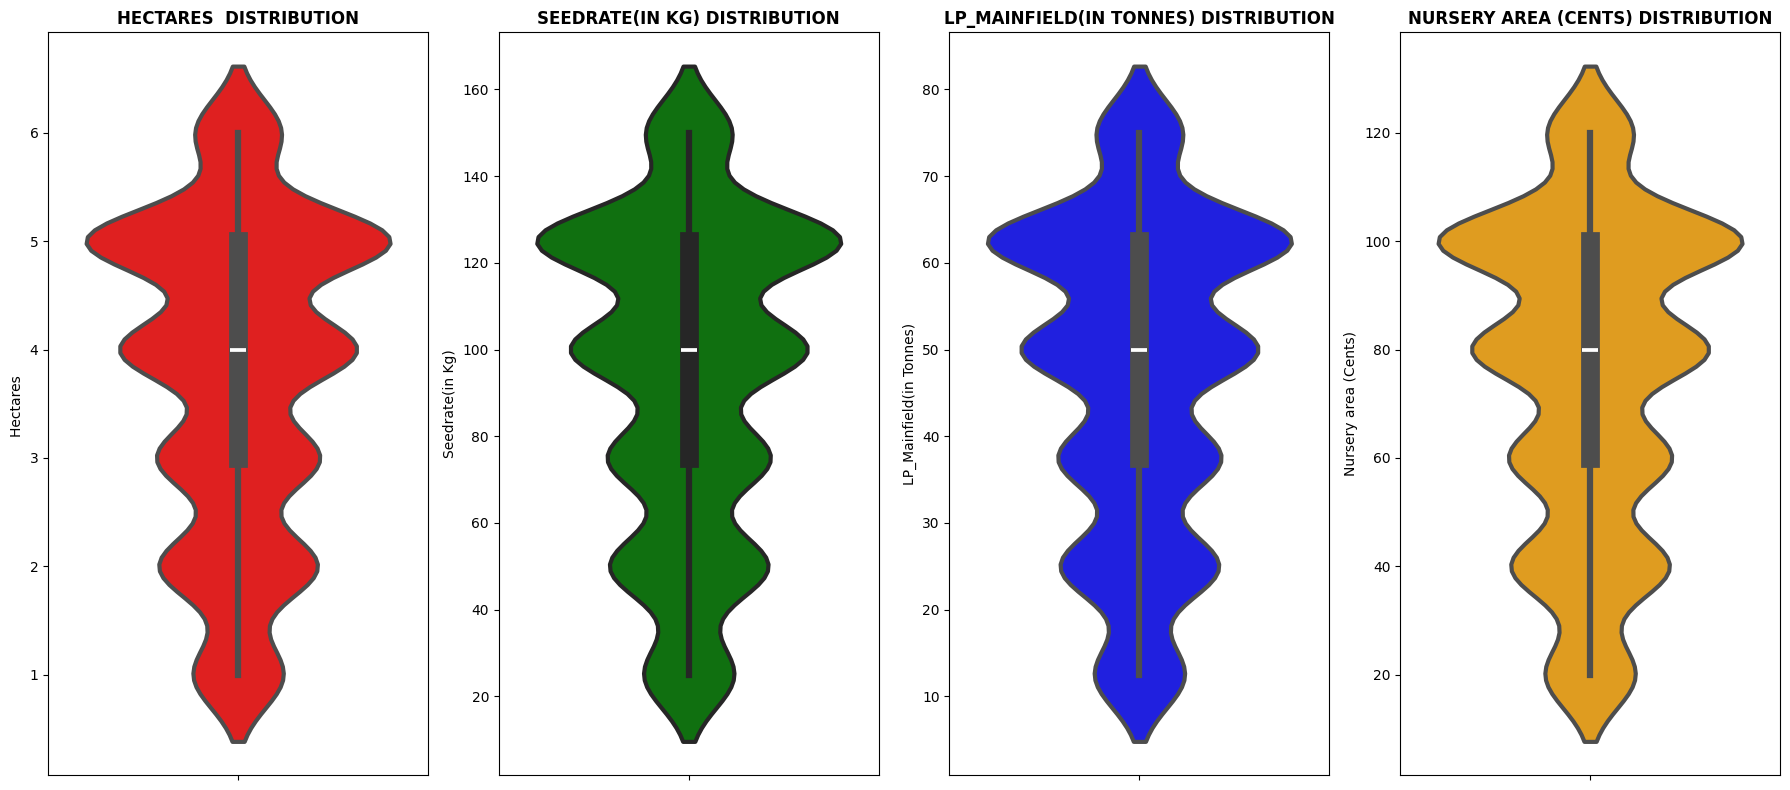


EXPLORATORY ANALYSIS COMPLETED


In [19]:
if len(numeric_features) > 0:
    n_cols = min(4, len(numeric_features))
    
    plt.figure(figsize=(18, 8))
    colors = ['red', 'green', 'blue', 'orange']
    
    for idx, feature in enumerate(numeric_features[:4]):
        plt.subplot(1, n_cols, idx + 1)
        plt.title(f'{feature.upper()} DISTRIBUTION', fontsize=12, fontweight='bold')
        sns.violinplot(y=df[feature], color=colors[idx % len(colors)], linewidth=3)
    
    plt.tight_layout()
    plt.show()

print("\n" + "=" * 60)
print("EXPLORATORY ANALYSIS COMPLETED")
print("=" * 60)